# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Arief setiawan
- **Email:** mc189d5y1641@student.devacademy.id
- **ID Dicoding:** MC189D5Y1641

## Menentukan Pertanyaan Bisnis

1. Apa pola perubahan jumlah penyewaan sepeda dari pagi hingga malam dalam satu hari?
2. Mengapa jumlah penyewaan meningkat atau menurun pada jam tertentu meskipun kondisi cuaca serupa?
3. Kapan waktu paling sibuk dalam seminggu untuk penyewaan sepeda berdasarkan pola harian dan per jam?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df=pd.read_csv('data/day.csv')
day_df.head()   

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df=pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Assessing Data Day

In [5]:
day_df.info()
day_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Pada saat menampilkan data.info yang menampilkan jenis jenis data dari setiap kolom terdapat suatu keanehan. Yaitu dimana kolom dteday yang harusnya bertipe data datetime karena berisikan tanggal dan hari, tetapi pada info berisikan object.
- Pada saat pengecekan data yang null atau kosong ternyata tidak ada data yang bernilai null atau kosong.

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Pada saat menampilkan data describe juga tidak terdapat hal yang aneh.

In [7]:
day_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Length: 731, dtype: bool

- tidak terdapat data yang terduplikasi.

#### Assessing Data Hour

In [8]:
hour_df.info()
hour_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
hour_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Length: 17379, dtype: bool

- Pada dataset hour.csv memiliki hal yang sama seperti dataset day.csv dimana kolom dteday bertipe object dimana yang harusnya bertipe datetime karena berisikan tanggal.

### Cleaning Data

In [11]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

- Seperti yang ditemukan sebelumnya pada assessing data sebelumnya, kedua dataset pada kolom dteday masih menggunakan tipe data object. Disini saya mengubahnya menjadi tipe data datetime.

## Exploratory Data Analysis (EDA)

In [12]:
# Melihat ringkasan statistik dasar
day_df.describe(include='all')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Berdasarkan ringkasan statistik dari dataset day.csv, terdapat 731 hari pengamatan dari 1 Januari 2011 hingga 31 Desember 2012. Mayoritas hari memiliki kondisi cerah hingga sedikit berawan, dengan suhu rata-rata 0.495 (skala normalisasi), kelembaban rata-rata 0.628, serta kecepatan angin rata-rata 0.190, menunjukkan bahwa sebagian besar hari memiliki cuaca yang cukup nyaman untuk bersepeda. Rata-rata jumlah penyewa sepeda per hari adalah 4.504 orang, dengan variasi yang cukup besar, di mana jumlah minimum hanya 22 orang, sedangkan maksimum mencapai 8.714 orang. Penyewa terdiri dari pengguna tidak terdaftar (848 orang per hari) dan pengguna terdaftar (3.656 orang per hari), dengan pola penyewaan yang lebih dominan pada musim semi dan musim panas, sebagaimana ditunjukkan oleh rata-rata season sebesar 2.50. Selain itu, rata-rata bulan (mnth) 6.52 mengindikasikan bahwa periode pertengahan tahun, terutama musim panas, merupakan waktu dengan aktivitas penyewaan yang tinggi. Secara keseluruhan, data ini menunjukkan bahwa penyewaan sepeda cenderung meningkat saat cuaca baik dengan suhu nyaman dan angin tidak terlalu kencang, serta adanya perbedaan signifikan antara pengguna terdaftar dan tidak terdaftar dalam pola peminjaman sepeda.

In [13]:
# Melihat ringkasan statistik dasar
hour_df.describe(include='all')
hour_df


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Dataset hour_df berisi data penyewaan sepeda per jam dengan 17.379 baris, sementara day_df adalah agregasi harian dengan 731 baris. Perbedaan utama terletak pada detail waktu, di mana hour_df mencakup kolom jam (hr), sehingga menunjukkan variasi tinggi dalam jumlah penyewaan (cnt), sementara day_df lebih stabil karena sudah dijumlahkan per hari. Variabel cuaca (temp, hum, windspeed) di hour_df lebih fluktuatif dibanding day_df, yang hanya menyajikan rata-rata harian. Selain itu, hour_df mencatat beberapa jam dengan penyewaan sangat rendah (cnt minimal = 1), sedangkan di day_df, jumlah penyewaan selalu lebih besar (cnt minimal = 22) karena sudah dikalkulasikan dalam satu hari penuh.

In [14]:
# 1.Pola perubahan jumlah penyewaan sepeda dari pagi hingga malam hari
hourly_trend = hour_df.groupby("hr")["cnt"].mean().reset_index()
hourly_trend.columns = ["Hour", "Avg_Rentals"]
hourly_trend

,Hour,Avg_Rentals
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


Pada jam 00:00 hingga 05:00, jumlah penyewaan sepeda sangat rendah. Hal ini bisa disebabkan karena sebagian besar orang sedang beristirahat, sehingga kebutuhan akan sepeda di jam-jam ini sangat sedikit.
Peningkatan signifikan mulai terjadi sekitar pukul 06:00, yang menunjukkan aktivitas pagi hari mulai berjalan.
Puncak pertama terjadi sekitar pukul 08:00 - 09:00, di mana rata-rata penyewaan mencapai angka tertinggi. Hal ini dapat dikaitkan dengan jam sibuk orang-orang yang berangkat kerja atau sekolah.
Setelah pukul 09:00, jumlah penyewaan menurun hingga siang hari. Ini bisa jadi karena kebanyakan pekerja sudah sampai di tempat kerja dan aktivitas bersepeda berkurang.
Puncak kedua terjadi pada pukul 17:00 - 18:00, yang mengindikasikan waktu pulang kerja. Pola ini menunjukkan bahwa banyak orang menggunakan sepeda sebagai alat transportasi utama di jam sibuk.
Setelah pukul 19:00, tren penyewaan mulai menurun lagi secara bertahap, menunjukkan bahwa penggunaan sepeda untuk keperluan sehari-hari mulai berkurang saat malam tiba.

In [15]:
# 2. Analisis jumlah penyewaan berdasarkan jam dan kondisi cuaca
weather_hourly_trend = hour_df.groupby(["hr", "weathersit"])["cnt"].mean().reset_index()
weather_hourly_trend.columns = ["Hour", "Weather_Condition", "Avg_Rentals"]
weather_hourly_trend

,Hour,Weather_Condition,Avg_Rentals
0,0,1,59.161554
1,0,2,47.232432
2,0,3,28.115385
3,1,1,34.395918
4,1,2,35.541899
...,...,...,...
70,22,2,116.823171
71,22,3,70.345455
72,23,1,93.981707
73,23,2,85.171598


Ketika kondisi cuaca baik (kategori 1 - cerah/sebagian berawan), jumlah penyewaan cenderung tinggi sepanjang hari, dengan puncak yang tetap terjadi pada pukul 08:00 dan 17:00.

Ketika kondisi cuaca kurang baik (kategori 2 - mendung/berawan, kategori 3 - hujan ringan), penyewaan masih tetap tinggi di jam sibuk, tetapi jumlahnya lebih rendah dibandingkan saat cuaca cerah.

Namun, meskipun cuaca buruk, jam sibuk tetap memiliki jumlah penyewaan yang signifikan. Artinya, meskipun ada faktor cuaca yang kurang menguntungkan, orang masih tetap menggunakan sepeda terutama saat jam berangkat dan pulang kerja.

In [16]:
# 3. Waktu paling sibuk dalam seminggu berdasarkan pola harian dan per jam
weekly_hourly_trend = hour_df.groupby(["weekday", "hr"])["cnt"].mean().reset_index()
weekly_hourly_trend.columns = ["Weekday", "Hour", "Avg_Rentals"]
weekly_hourly_trend

,Weekday,Hour,Avg_Rentals
0,0,0,93.990385
1,0,1,77.432692
2,0,2,61.627451
3,0,3,31.144231
4,0,4,9.362745
...,...,...,...
163,6,19,239.932692
164,6,20,180.865385
165,6,21,156.000000
166,6,22,139.663462


**Pada hari kerja (Senin - Jumat):**

Pola dua puncak sangat jelas terlihat. Puncak pagi terjadi sekitar pukul 08:00, dan puncak sore terjadi sekitar pukul 17:00 - 18:00.
Ini menunjukkan bahwa kebanyakan pengguna sepeda adalah pekerja dan pelajar yang menggunakan sepeda sebagai alat transportasi utama ke kantor/sekolah.
Pada siang hari (antara pukul 10:00 - 16:00), jumlah penyewaan cenderung lebih stabil tetapi lebih rendah dibandingkan jam sibuk.

**Pada akhir pekan (Sabtu - Minggu):**

Tidak ada pola dua puncak yang tajam seperti pada hari kerja.
Penyewaan sepeda cenderung lebih merata sepanjang hari, dengan sedikit peningkatan pada sore hari.
Ini menunjukkan bahwa pada akhir pekan, sepeda lebih banyak digunakan untuk rekreasi atau aktivitas santai, bukan untuk keperluan transportasi utama.

In [17]:
# Menggabungkan dataset berdasarkan dteday
merged_df = pd.merge(hour_df, day_df, on="dteday", how="inner", validate="many_to_one", suffixes=("_hourly", "_daily"))

# Menampilkan beberapa baris pertama dari data gabungan
merged_df.head()


,instant_hourly,dteday,season_hourly,yr_hourly,mnth_hourly,hr,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,...,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Saya menggabungkan `hour_df` dan `day_df` menggunakan kolom `dteday` karena keduanya memiliki rentang waktu yang sama, dengan `day_df` sebagai versi agregasi harian dari `hour_df`. Hasilnya, saya mendapatkan dataset baru `merged_df` dengan 32 kolom, di mana setiap baris tetap mewakili data per jam, tetapi kini juga dilengkapi dengan informasi harian, seperti total penyewaan sepeda (`cnt_day`) dan kondisi cuaca rata-rata per hari (`temp_day`, `hum_day`). Dengan penggabungan ini, saya bisa menganalisis bagaimana pola penyewaan per jam berkontribusi terhadap total harian, atau melihat apakah faktor cuaca harian berdampak pada jumlah sepeda yang disewa setiap jam.

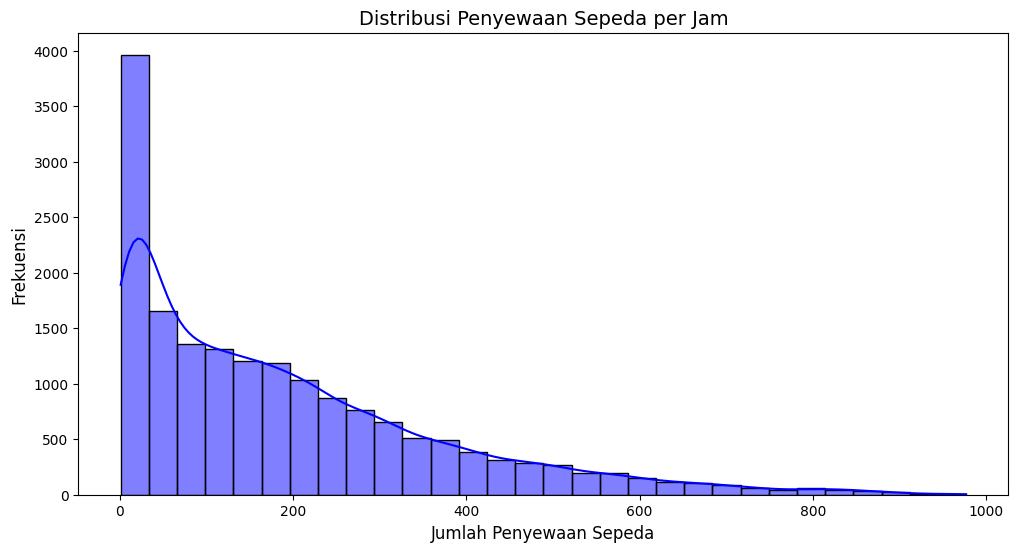

In [18]:
# Plot Distribusi Penyewaan Sepeda (Histogram)
plt.figure(figsize=(12, 6))
sns.histplot(merged_df["cnt_hourly"], bins=30, kde=True, color="blue")
plt.title("Distribusi Penyewaan Sepeda per Jam", fontsize=14)
plt.xlabel("Jumlah Penyewaan Sepeda", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.show()


Grafik histogram menunjukkan bahwa:
- Distribusi jumlah penyewaan sepeda condong ke kanan (right-skewed), yang berarti lebih banyak jam dengan penyewaan rendah dibanding jam dengan penyewaan tinggi.
- Ada beberapa jam dengan penyewaan yang sangat tinggi, yang mungkin merupakan lonjakan saat jam sibuk (morning & evening rush hours).

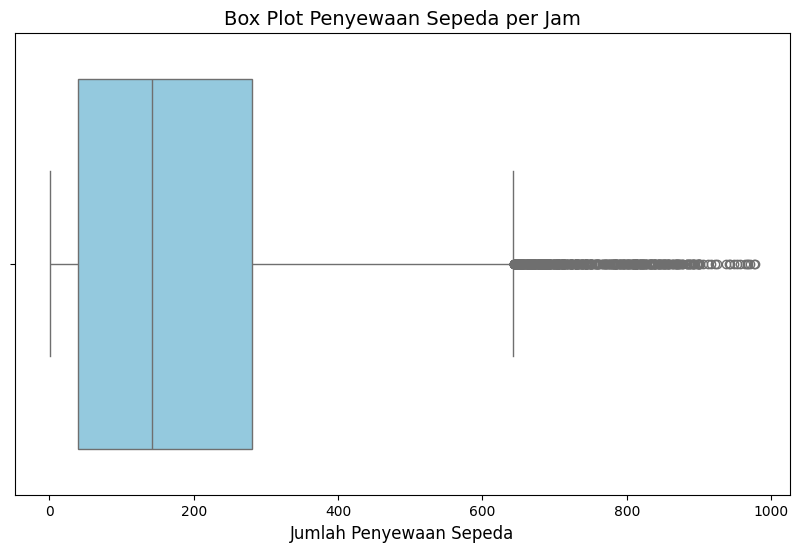

In [19]:
# Box Plot Penyewaan Sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df["cnt_hourly"], color="skyblue")
plt.title("Box Plot Penyewaan Sepeda per Jam", fontsize=14)
plt.xlabel("Jumlah Penyewaan Sepeda", fontsize=12)
plt.show()


Box plot menunjukkan bahwa:

- Ada banyak outlier di bagian atas, yang menunjukkan beberapa jam dengan jumlah penyewaan yang jauh lebih tinggi dari rata-rata.
- Sebagian besar penyewaan berkisar di antara 0 hingga sekitar 500 sepeda per jam, tetapi ada beberapa lonjakan yang melebihi 800.
Ini mengonfirmasi pola dari histogram sebelumnya, di mana distribusi condong ke kanan.

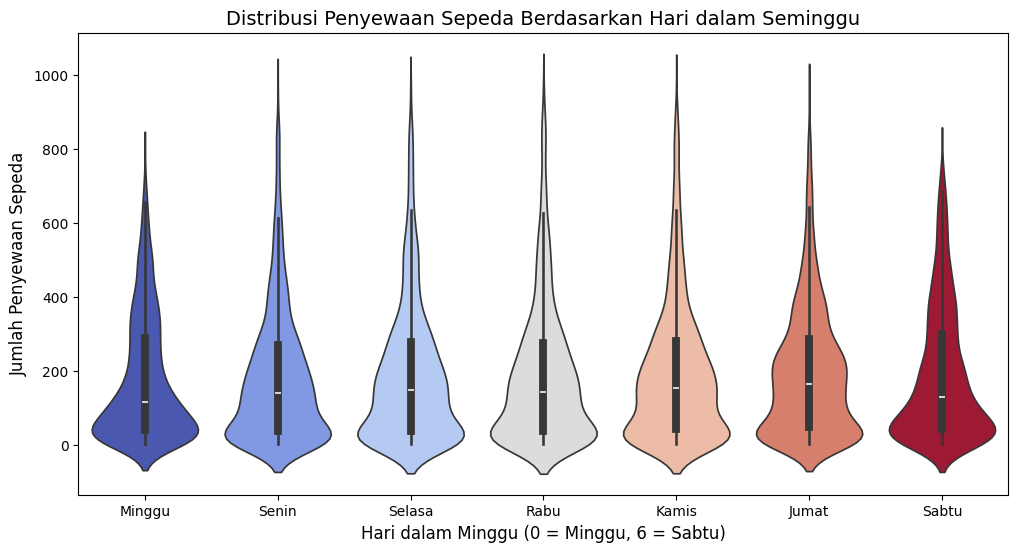

In [20]:
# Violin Plot Penyewaan Sepeda berdasarkan Hari dalam Seminggu
plt.figure(figsize=(12, 6))
sns.violinplot(data=merged_df, x="weekday_hourly", y="cnt_hourly", hue="weekday_hourly", palette="coolwarm", legend=False)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Hari dalam Seminggu", fontsize=14)
plt.xlabel("Hari dalam Minggu (0 = Minggu, 6 = Sabtu)", fontsize=12)
plt.ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
plt.xticks(ticks=range(7), labels=["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"])
plt.show()


Violin plot menunjukkan bahwa:

- Penyebaran jumlah penyewaan lebih luas pada hari kerja dibanding akhir pekan.
- Hari kerja memiliki lebih banyak jam dengan penyewaan tinggi, kemungkinan besar karena commuting.
- Minggu dan Sabtu memiliki distribusi yang lebih rata, menunjukkan penggunaan yang lebih merata sepanjang hari.

Distribusi penyewaan sepeda condong ke kanan, dengan lebih banyak jam dengan penyewaan rendah dibanding penyewaan tinggi.

Banyak outlier dalam jumlah penyewaan sepeda, terutama di jam-jam sibuk.

Hari kerja memiliki pola penyewaan yang lebih tinggi dan lebih terfokus, sedangkan akhir pekan memiliki penyebaran yang lebih merata.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Apa pola perubahan jumlah penyewaan sepeda dari pagi hingga malam dalam satu hari?

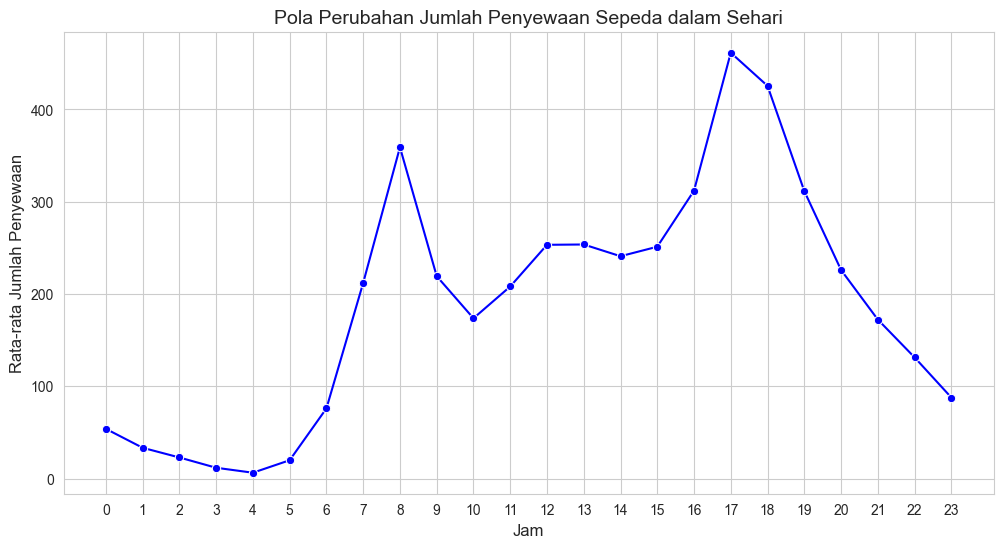

In [21]:
# Set style seaborn
sns.set_style("whitegrid")

# 1. Pola perubahan jumlah penyewaan sepeda dari pagi hingga malam dalam satu hari
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df.groupby("hr")["cnt_hourly"].mean(), marker="o", color="b")
plt.title("Pola Perubahan Jumlah Penyewaan Sepeda dalam Sehari", fontsize=14)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.xticks(range(0, 24))
plt.show()


#### Berdasarkan visualisasi diatas, kita dapat melihat bahwa jumlah penyewaan sepeda memiliki dua puncak utama dalam sehari:  
- **Pagi hari sekitar jam 8.00** → Kemungkinan besar karena orang menggunakan sepeda untuk pergi bekerja atau sekolah.  
- **Sore hari sekitar jam 17.00 - 18.00** → Ini menunjukkan bahwa banyak pengguna sepeda menggunakannya untuk perjalanan pulang setelah bekerja atau sekolah.  

Selain itu, penyewaan sepeda **relatif rendah pada malam hari dan dini hari**, yang masuk akal karena lebih sedikit orang yang beraktivitas di luar rumah pada waktu tersebut. Hal ini beraarti pola penyewaan sepeda menunjukkan lonjakan pada jam sibuk kerja, yaitu pagi dan sore, sedangkan siang hingga malam memiliki jumlah penyewaan yang lebih rendah.  

### Pertanyaan 2:
Mengapa jumlah penyewaan sepeda meningkat atau menurun pada jam tertentu meskipun kondisi cuaca serupa?

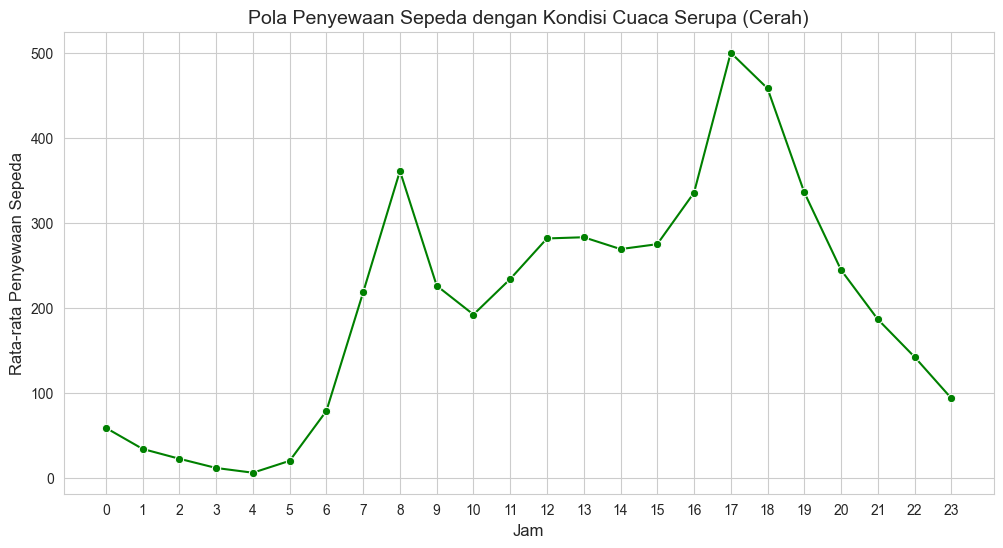

In [22]:
# 2. Mengapa jumlah penyewaan meningkat atau menurun pada jam tertentu meskipun kondisi cuaca serupa?

# Memilih data dengan kondisi cuaca serupa (weathersit = 1, cerah)
weather_filtered_df = merged_df[merged_df["weathersit_hourly"] == 1]

plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_filtered_df.groupby("hr")["cnt_hourly"].mean(), marker="o", color="g")
plt.title("Pola Penyewaan Sepeda dengan Kondisi Cuaca Serupa (Cerah)", fontsize=14)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.xticks(range(0, 24))
plt.show()


 Visualisasi diatas menunjukkan pola penyewaan sepeda **hanya untuk cuaca cerah** (**weathersit = 1**), sehingga faktor cuaca tidak berpengaruh pada pola penggunaan sepeda.  

Meskipun cuaca stabil:  
- **Puncak penggunaan tetap terjadi di pagi dan sore hari** (sekitar jam 8 dan 17-18).  
- **Siang dan malam hari tetap memiliki jumlah penyewaan yang lebih rendah**.  

Ini berarti bahwa **cuaca bukan faktor utama yang mempengaruhi lonjakan penyewaan**, melainkan **kebiasaan pengguna** seperti commuting (perjalanan kerja dan pulang kerja). Meskiun jam penggunaan sepeda lebih dipengaruhi oleh kebutuhan perjalanan sehari-hari (commuting) dibandingkan dengan cuaca. Bahkan ketika cuaca cerah, pola penggunaan tetap mengikuti jam sibuk kerja.  


### Pertanyaan 3:
Kapan waktu paling sibuk dalam seminggu untuk penyewaan sepeda berdasarkan pola harian dan per jam?

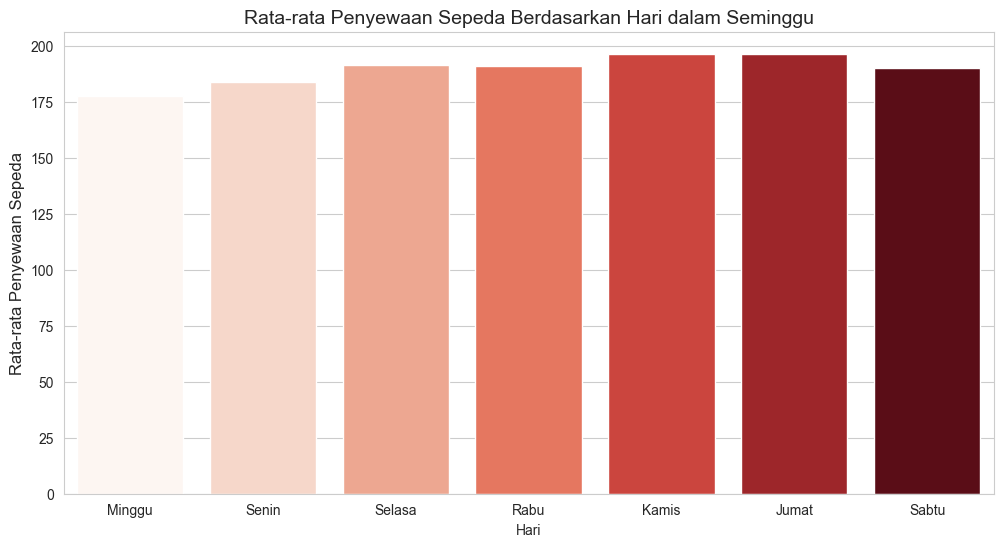

In [23]:
# 3. Kapan waktu paling sibuk dalam seminggu untuk penyewaan sepeda?

plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df.groupby("weekday_hourly")["cnt_hourly"].mean().reset_index(), 
            x="weekday_hourly", y="cnt_hourly", hue="weekday_hourly", palette="Reds", legend=False)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu", fontsize=14)
plt.xlabel("Hari")
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.xticks(ticks=range(7), labels=["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"])
plt.show()


Berdasarkan visualisasi diatas bisa dilihat bahwa:  
- **Hari kerja (Senin - Jumat) memiliki jumlah penyewaan yang lebih tinggi dibanding akhir pekan**.  
- **Puncak penyewaan terjadi pada Selasa hingga Kamis**, sementara Sabtu dan Minggu memiliki jumlah penyewaan lebih rendah.  

Ini menunjukkan bahwa **mayoritas pengguna sepeda menggunakannya untuk perjalanan ke kantor atau sekolah**, sehingga penyewaan sepeda lebih tinggi pada hari kerja.  

Sebaliknya, pada akhir pekan, jumlah penyewaan cenderung turun, yang mungkin disebabkan oleh:  
- Lebih sedikit orang yang bekerja.  
- Penggunaan sepeda untuk rekreasi yang lebih fleksibel dibanding jadwal harian commuting. 

## Conclusion

 **1. Pola Penggunaan Harian**  
- Penyewaan sepeda mengalami **dua puncak utama**, yaitu **pagi hari sekitar jam 8.00** dan **sore hari sekitar jam 17.00 - 18.00**.  
- Pola ini menunjukkan bahwa **sepeda banyak digunakan untuk perjalanan kerja atau sekolah (commuting)**.  
- **Pada malam hari dan dini hari, jumlah penyewaan cenderung rendah**, yang menunjukkan bahwa penggunaan sepeda lebih sedikit di luar jam sibuk.  

 **2. Faktor yang Mempengaruhi Lonjakan atau Penurunan Penyewaan**  
- **Cuaca bukan faktor utama dalam lonjakan penyewaan sepeda.** Bahkan ketika kondisi cuaca cerah, pola penyewaan tetap menunjukkan puncak pada jam commuting.  
- Ini menunjukkan bahwa **kebutuhan perjalanan harian lebih berpengaruh dibandingkan faktor eksternal seperti cuaca**.  

 **3. Waktu Paling Sibuk dalam Seminggu**  
- **Hari kerja (Senin - Jumat) memiliki tingkat penyewaan lebih tinggi dibanding akhir pekan**.  
- **Puncak tertinggi terjadi pada Selasa hingga Kamis**, sedangkan **Sabtu dan Minggu memiliki jumlah penyewaan yang lebih rendah**.  
- Ini menunjukkan bahwa **mayoritas pengguna memanfaatkan sepeda untuk keperluan transportasi harian (bekerja/sekolah), bukan hanya untuk rekreasi**.  

### **Kesimpulan Akhir**  
- **Pola commuting mendominasi penggunaan sepeda**, dengan lonjakan pada pagi dan sore hari.  
- **Cuaca tidak terlalu mempengaruhi pola ini**, karena penyewaan tetap tinggi pada jam sibuk kerja.  
- **Hari kerja lebih sibuk dibanding akhir pekan**, karena penggunaan sepeda lebih terkait dengan aktivitas sehari-hari dibanding rekreasi.  

 **Implikasi dan Rekomendasi**  
 1. **Optimalisasi Layanan Sepeda**  
   - Menyediakan lebih banyak sepeda atau memperbaiki infrastruktur selama **jam sibuk pagi dan sore hari**.  
   - Mengoptimalkan lokasi stasiun penyewaan sepeda di area perkantoran dan sekolah.  

2. **Promosi dan Penawaran pada Akhir Pekan**  
   - Karena penggunaan sepeda lebih rendah di akhir pekan, perusahaan penyewaan bisa menawarkan **diskon atau promosi untuk rekreasi**.  
   - Bisa dibuat program **"weekend bike tours"** untuk menarik lebih banyak pengguna di hari libur.  

3. **Pengembangan Infrastruktur Perkotaan**  
   - Pemerintah atau pengelola kota dapat menyesuaikan **jalur sepeda dan parkir sepeda** sesuai dengan pola commuting harian.  
   - **Menambah jalur sepeda di area perkantoran atau stasiun transportasi umum** agar lebih mudah diakses pengguna.  



In [24]:
!pip freeze > requirements.txt

In [25]:
merged_df.to_csv("all_data.csv", index=False)